In [4]:
# Portfolio Performance Tracker - Visual Studio Code Jupyter Notebook
# Created for $2000 Stock Portfolio vs S&P 500 and Russell 2000

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style to match reference image
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
plt.rcParams['grid.alpha'] = 0.3

🚀 Starting Portfolio Tracker...
📊 Portfolio Tracker Initialized
💰 Initial Investment: $1,991.69
📅 Tracking Period: 2025-08-05 to 2025-12-27
🏢 Holdings: 8 positions
📡 Fetching current market data...
🎯 Fetching data for tickers: ['CYTK', 'AMD', 'SOUN', 'IONS', 'QS', 'RIG', 'CRGY', 'SERV', 'SPY', 'IWM']
✅ Successfully fetched data for 10 securities
📅 Data range: 2025-07-31 to 2025-08-05
📊 Available tickers: ['AMD', 'CRGY', 'CYTK', 'IONS', 'IWM', 'QS', 'RIG', 'SERV', 'SOUN', 'SPY']
🧮 Calculating portfolio performance...
📅 Using 2025-08-05 as portfolio start date
✅ Portfolio performance calculated successfully
📊 All lines start at $1,991.69 on 2025-08-05

📊 PORTFOLIO PERFORMANCE SUMMARY

💰 PORTFOLIO VALUE:
   Initial Investment:     $1,991.69
   Current Value:          $2,299.42
   Total Return:           $0.00 (+0.00%)

📈 BENCHMARK COMPARISON:
   Portfolio Return:       +0.00%
   S&P 500 Return:         +0.00%
   Russell 2000 Return:    +0.00%

   vs S&P 500:             +0.00% 🔴
   vs Rus

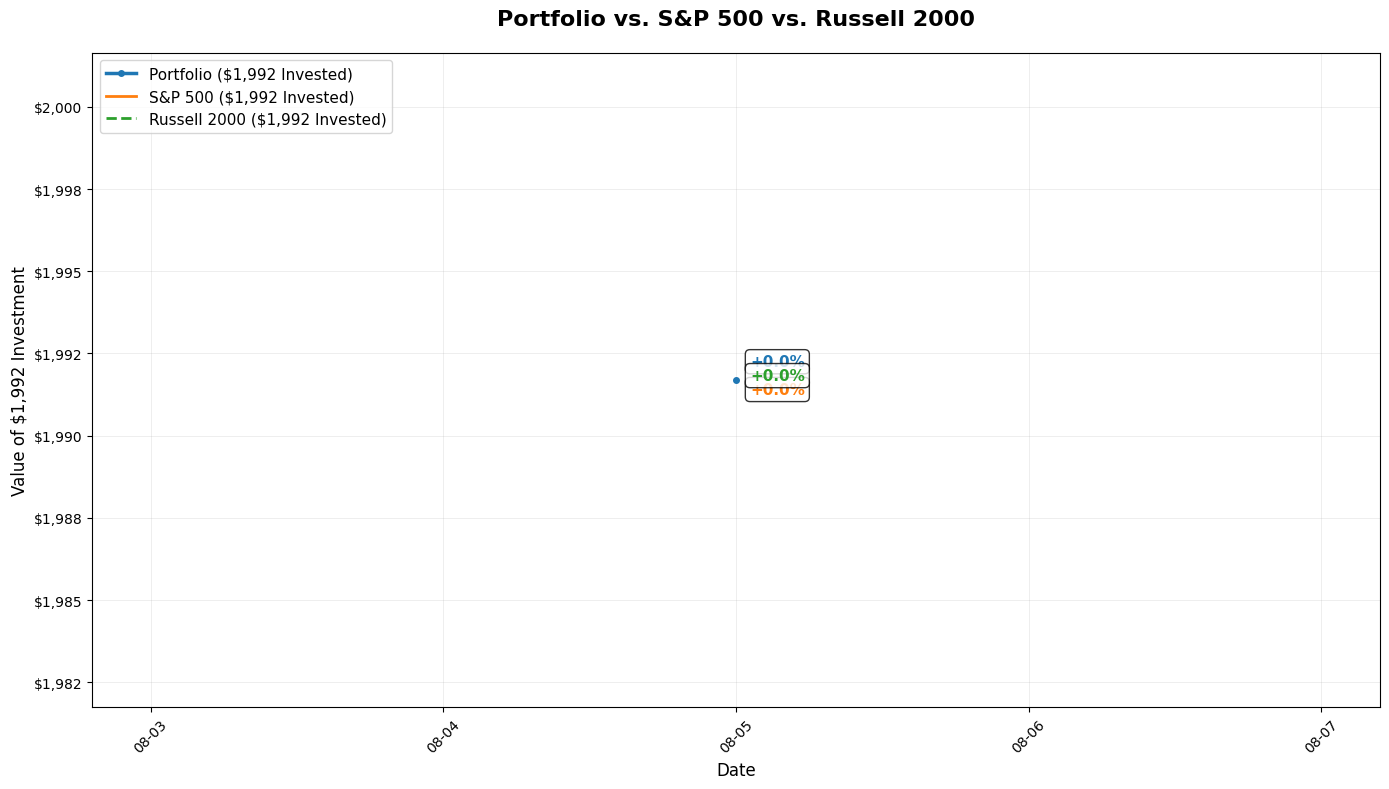

📁 Data exported to portfolio_data_20250805.csv


In [6]:
class PortfolioTracker:
    def __init__(self):
        """Initialize the portfolio tracker with holdings and benchmarks"""
        
        # Portfolio holdings as of August 5, 2025
        self.holdings = {
            'CYTK': {'shares': 15, 'entry_price': 36.69, 'allocation': 550.35},
            'AMD': {'shares': 2, 'entry_price': 143.40, 'allocation': 286.80},
            'SOUN': {'shares': 6, 'entry_price': 29.10, 'allocation': 174.60},
            'IONS': {'shares': 7, 'entry_price': 43.37, 'allocation': 303.59},
            'QS': {'shares': 15, 'entry_price': 6.50, 'allocation': 97.50},
            'RIG': {'shares': 35, 'entry_price': 4.26, 'allocation': 149.10},
            'CRGY': {'shares': 10, 'entry_price': 14.50, 'allocation': 145.00},
            'SERV': {'shares': 67, 'entry_price': 4.25, 'allocation': 284.75}
        }
        
        # Portfolio metadata
        self.initial_investment = sum(stock['allocation'] for stock in self.holdings.values())
        self.start_date = datetime.now().strftime('%Y-%m-%d')  # Today's date
        self.end_date = '2025-12-27'
        
        # Benchmark tickers
        self.benchmarks = {
            'S&P 500': 'SPY',
            'Russell 2000': 'IWM'
        }
        
        # Colors for plotting (matching reference style)
        self.colors = {
            'Portfolio': '#1f77b4',  # Blue
            'S&P 500': '#ff7f0e',    # Orange
            'Russell 2000': '#2ca02c' # Green
        }
        
        print("📊 Portfolio Tracker Initialized")
        print(f"💰 Initial Investment: ${self.initial_investment:,.2f}")
        print(f"📅 Tracking Period: {self.start_date} to {self.end_date}")
        print(f"🏢 Holdings: {len(self.holdings)} positions")
        
    def fetch_current_data(self):
        """Fetch current price data for all holdings and benchmarks"""
        
        print("📡 Fetching current market data...")
        
        # Get all tickers
        portfolio_tickers = list(self.holdings.keys())
        benchmark_tickers = list(self.benchmarks.values())
        all_tickers = portfolio_tickers + benchmark_tickers
        
        print(f"🎯 Fetching data for tickers: {all_tickers}")
        
        try:
            # Fetch data with more robust handling
            # Start from a few days before today to ensure we have baseline data
            start_fetch_date = (datetime.now() - timedelta(days=5)).strftime('%Y-%m-%d')
            raw_data = yf.download(all_tickers, start=start_fetch_date, progress=False)
            
            # Handle different data structures from yfinance
            if raw_data.empty:
                print("❌ No data returned from yfinance")
                return False
            
            # Handle multi-ticker vs single ticker cases
            if len(all_tickers) == 1:
                # Single ticker case
                if 'Adj Close' in raw_data.columns:
                    self.price_data = pd.DataFrame({all_tickers[0]: raw_data['Adj Close']})
                else:
                    # If no 'Adj Close', use 'Close'
                    self.price_data = pd.DataFrame({all_tickers[0]: raw_data['Close']})
            else:
                # Multiple tickers case
                if isinstance(raw_data.columns, pd.MultiIndex):
                    # Multi-level columns (typical case)
                    if 'Adj Close' in raw_data.columns.get_level_values(0):
                        self.price_data = raw_data['Adj Close']
                    elif 'Close' in raw_data.columns.get_level_values(0):
                        self.price_data = raw_data['Close']
                    else:
                        print("❌ Could not find price data columns")
                        return False
                else:
                    # Single level columns
                    self.price_data = raw_data
            
            # Clean up data
            self.price_data = self.price_data.fillna(method='ffill').fillna(method='bfill')
            
            # Verify we have some data
            if self.price_data.empty:
                print("❌ Price data is empty after processing")
                return False
            
            print(f"✅ Successfully fetched data for {len(self.price_data.columns)} securities")
            print(f"📅 Data range: {self.price_data.index[0].date()} to {self.price_data.index[-1].date()}")
            print(f"📊 Available tickers: {list(self.price_data.columns)}")
            
            return True
            
        except Exception as e:
            print(f"❌ Error fetching data: {e}")
            print("🔄 Trying alternative approach...")
            
            # Alternative approach: fetch tickers individually
            return self.fetch_data_individually(all_tickers)
    
    def fetch_data_individually(self, tickers):
        """Fallback method to fetch data for each ticker individually"""
        
        print("🔄 Fetching tickers individually...")
        
        price_data_dict = {}
        successful_tickers = []
        
        for ticker in tickers:
            try:
                print(f"   Fetching {ticker}...")
                start_fetch_date = (datetime.now() - timedelta(days=5)).strftime('%Y-%m-%d')
                ticker_data = yf.download(ticker, start=start_fetch_date, progress=False)
                
                if not ticker_data.empty:
                    # Use Close price if available
                    if 'Close' in ticker_data.columns:
                        price_data_dict[ticker] = ticker_data['Close']
                    elif 'Adj Close' in ticker_data.columns:
                        price_data_dict[ticker] = ticker_data['Adj Close']
                    else:
                        # Take the first numeric column
                        numeric_cols = ticker_data.select_dtypes(include=[np.number]).columns
                        if len(numeric_cols) > 0:
                            price_data_dict[ticker] = ticker_data[numeric_cols[0]]
                    
                    successful_tickers.append(ticker)
                else:
                    print(f"   ⚠️  No data for {ticker}")
                    
            except Exception as e:
                print(f"   ❌ Failed to fetch {ticker}: {e}")
        
        if price_data_dict:
            self.price_data = pd.DataFrame(price_data_dict)
            self.price_data = self.price_data.fillna(method='ffill').fillna(method='bfill')
            
            print(f"✅ Successfully fetched {len(successful_tickers)} out of {len(tickers)} tickers")
            print(f"📊 Available data: {successful_tickers}")
            
            if len(self.price_data) > 0:
                print(f"📅 Data range: {self.price_data.index[0].date()} to {self.price_data.index[-1].date()}")
                return True
        
        print("❌ Could not fetch any valid data")
        return False
    
    def calculate_portfolio_performance(self):
        """Calculate daily portfolio value and performance metrics"""
        
        if not hasattr(self, 'price_data'):
            print("❌ No price data available. Run fetch_current_data() first.")
            return None
        
        print("🧮 Calculating portfolio performance...")
        
        # Find today's date (August 5, 2025) in the data
        today = datetime.now().date()
        available_dates = [d.date() for d in self.price_data.index]
        
        # Find the closest date to today (in case market is closed)
        if today in available_dates:
            start_date = today
        else:
            # Use the most recent available date
            start_date = max(available_dates)
        
        print(f"📅 Using {start_date} as portfolio start date")
        
        # Filter data to start from our chosen start date
        start_datetime = pd.Timestamp(start_date)
        filtered_data = self.price_data[self.price_data.index >= start_datetime].copy()
        
        if len(filtered_data) == 0:
            print("❌ No data available from start date")
            return None
        
        # Calculate daily portfolio values
        portfolio_values = []
        dates = filtered_data.index
        missing_tickers = []
        
        for date in dates:
            daily_value = 0
            for ticker, position in self.holdings.items():
                if ticker in filtered_data.columns:
                    current_price = filtered_data.loc[date, ticker]
                    if not pd.isna(current_price) and current_price > 0:
                        daily_value += position['shares'] * current_price
                    else:
                        daily_value += position['allocation']
                else:
                    daily_value += position['allocation']
                    if ticker not in missing_tickers:
                        missing_tickers.append(ticker)
            
            portfolio_values.append(daily_value)
        
        if missing_tickers:
            print(f"⚠️  Using entry prices for missing tickers: {missing_tickers}")
        
        # Create performance DataFrame
        self.performance_data = pd.DataFrame({
            'Date': dates,
            'Portfolio_Value': portfolio_values
        }).set_index('Date')
        
        # All three lines start at the SAME value on the start date
        start_portfolio_value = portfolio_values[0]  # Use actual first day portfolio value
        
        # Portfolio normalized to start at initial value
        self.performance_data['Portfolio'] = (self.performance_data['Portfolio_Value'] / start_portfolio_value) * self.initial_investment
        
        # Benchmarks normalized to start at same initial investment
        for name, ticker in self.benchmarks.items():
            if ticker in filtered_data.columns:
                benchmark_prices = filtered_data[ticker]
                start_price = benchmark_prices.iloc[0]
                if start_price > 0:
                    price_ratio = benchmark_prices / start_price
                    self.performance_data[name] = self.initial_investment * price_ratio
                else:
                    print(f"⚠️  Invalid start price for {name}")
            else:
                print(f"⚠️  No data available for benchmark {name} ({ticker})")
        
        self.calculate_performance_metrics()
        print("✅ Portfolio performance calculated successfully")
        print(f"📊 All lines start at ${self.initial_investment:,.2f} on {start_date}")
        
    def calculate_performance_metrics(self):
        """Calculate key performance metrics"""
        
        latest_data = self.performance_data.iloc[-1]
        
        # Calculate returns using the performance data (not raw portfolio value)
        current_portfolio_value = latest_data['Portfolio']  # This is now normalized
        portfolio_return = ((current_portfolio_value - self.initial_investment) / self.initial_investment) * 100
        
        # Benchmark returns
        sp500_return = 0
        russell_return = 0
        
        if 'S&P 500' in latest_data and not pd.isna(latest_data['S&P 500']):
            sp500_return = ((latest_data['S&P 500'] - self.initial_investment) / self.initial_investment) * 100
        
        if 'Russell 2000' in latest_data and not pd.isna(latest_data['Russell 2000']):
            russell_return = ((latest_data['Russell 2000'] - self.initial_investment) / self.initial_investment) * 100
        
        # Store metrics
        self.metrics = {
            'current_value': latest_data['Portfolio_Value'] if 'Portfolio_Value' in latest_data else current_portfolio_value,
            'total_return_pct': portfolio_return,
            'total_return_dollar': current_portfolio_value - self.initial_investment,
            'sp500_return': sp500_return,
            'russell_return': russell_return,
            'sp500_outperformance': portfolio_return - sp500_return,
            'russell_outperformance': portfolio_return - russell_return,
            'days_tracked': len(self.performance_data)
        }
        
        # Calculate individual position performance
        self.position_performance = {}
        
        if hasattr(self, 'price_data') and len(self.price_data) > 0:
            latest_prices = self.price_data.iloc[-1]
            
            for ticker, position in self.holdings.items():
                if ticker in latest_prices and not pd.isna(latest_prices[ticker]):
                    current_price = latest_prices[ticker]
                    entry_price = position['entry_price']
                    position_return = ((current_price - entry_price) / entry_price) * 100
                    current_value = position['shares'] * current_price
                    
                    self.position_performance[ticker] = {
                        'entry_price': entry_price,
                        'current_price': current_price,
                        'shares': position['shares'],
                        'entry_value': position['allocation'],
                        'current_value': current_value,
                        'return_pct': position_return,
                        'return_dollar': current_value - position['allocation']
                    }
                else:
                    # Use entry price if current price not available
                    self.position_performance[ticker] = {
                        'entry_price': position['entry_price'],
                        'current_price': position['entry_price'],  # Fallback
                        'shares': position['shares'],
                        'entry_value': position['allocation'],
                        'current_value': position['allocation'],  # No change
                        'return_pct': 0.0,
                        'return_dollar': 0.0
                    }
    
    def plot_performance_chart(self, save_path=None):
        """Create performance chart matching the reference style"""
        
        if not hasattr(self, 'performance_data'):
            print("❌ No performance data available. Run calculate_portfolio_performance() first.")
            return
        
        # Create the plot
        fig, ax = plt.subplots(figsize=(14, 8))
        
        # Plot lines with actual dollar values
        ax.plot(self.performance_data.index, self.performance_data['Portfolio'], 
                color=self.colors['Portfolio'], linewidth=2.5, marker='o', markersize=4,
                label=f'Portfolio (${self.initial_investment:,.0f} Invested)', zorder=3)
        
        if 'S&P 500' in self.performance_data.columns:
            ax.plot(self.performance_data.index, self.performance_data['S&P 500'], 
                    color=self.colors['S&P 500'], linewidth=2, linestyle='-',
                    label=f'S&P 500 (${self.initial_investment:,.0f} Invested)', zorder=2)
        
        if 'Russell 2000' in self.performance_data.columns:
            ax.plot(self.performance_data.index, self.performance_data['Russell 2000'], 
                    color=self.colors['Russell 2000'], linewidth=2, linestyle='--',
                    label=f'Russell 2000 (${self.initial_investment:,.0f} Invested)', zorder=1)
        
        # Formatting to match reference
        ax.set_title('Portfolio vs. S&P 500 vs. Russell 2000', fontsize=16, fontweight='bold', pad=20)
        ax.set_xlabel('Date', fontsize=12)
        ax.set_ylabel(f'Value of ${self.initial_investment:,.0f} Investment', fontsize=12)
        ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
        ax.legend(loc='upper left', fontsize=11)
        
        # Format y-axis to show dollar amounts
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
        
        # Add performance annotations
        latest_data = self.performance_data.iloc[-1]
        
        # Portfolio performance annotation
        portfolio_return = ((latest_data['Portfolio'] - self.initial_investment) / self.initial_investment) * 100
        ax.annotate(f'{portfolio_return:+.1f}%', 
                   xy=(self.performance_data.index[-1], latest_data['Portfolio']),
                   xytext=(10, 10), textcoords='offset points',
                   fontsize=11, fontweight='bold', color=self.colors['Portfolio'],
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
        
        # Benchmark annotations
        if 'S&P 500' in latest_data and not pd.isna(latest_data['S&P 500']):
            sp500_return = ((latest_data['S&P 500'] - self.initial_investment) / self.initial_investment) * 100
            ax.annotate(f'{sp500_return:+.1f}%', 
                       xy=(self.performance_data.index[-1], latest_data['S&P 500']),
                       xytext=(10, -10), textcoords='offset points',
                       fontsize=11, fontweight='bold', color=self.colors['S&P 500'],
                       bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
        
        if 'Russell 2000' in latest_data and not pd.isna(latest_data['Russell 2000']):
            russell_return = ((latest_data['Russell 2000'] - self.initial_investment) / self.initial_investment) * 100
            ax.annotate(f'{russell_return:+.1f}%', 
                       xy=(self.performance_data.index[-1], latest_data['Russell 2000']),
                       xytext=(10, 0), textcoords='offset points',
                       fontsize=11, fontweight='bold', color=self.colors['Russell 2000'],
                       bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
        
        # Format dates on x-axis to show current dates properly
        import matplotlib.dates as mdates
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
        
        # Set date locator based on data range
        num_days = len(self.performance_data)
        if num_days <= 7:
            ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
        elif num_days <= 30:
            ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
        else:
            ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
        
        plt.xticks(rotation=45)
        
        # Set y-axis to start near the initial investment amount
        y_min = min(self.performance_data['Portfolio'].min(), 
                   self.performance_data.get('S&P 500', pd.Series([self.initial_investment])).min(),
                   self.performance_data.get('Russell 2000', pd.Series([self.initial_investment])).min()) * 0.995
        y_max = max(self.performance_data['Portfolio'].max(), 
                   self.performance_data.get('S&P 500', pd.Series([self.initial_investment])).max(),
                   self.performance_data.get('Russell 2000', pd.Series([self.initial_investment])).max()) * 1.005
        ax.set_ylim(y_min, y_max)
        
        # Tight layout
        plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"📊 Chart saved to {save_path}")
        
        plt.show()
    
    def print_performance_summary(self):
        """Print comprehensive performance summary"""
        
        if not hasattr(self, 'metrics'):
            print("❌ No metrics available. Run calculate_portfolio_performance() first.")
            return
        
        print("\n" + "="*60)
        print("📊 PORTFOLIO PERFORMANCE SUMMARY")
        print("="*60)
        
        # Overall Performance
        print(f"\n💰 PORTFOLIO VALUE:")
        print(f"   Initial Investment:     ${self.initial_investment:,.2f}")
        print(f"   Current Value:          ${self.metrics['current_value']:,.2f}")
        print(f"   Total Return:           ${self.metrics['total_return_dollar']:,.2f} ({self.metrics['total_return_pct']:+.2f}%)")
        
        # Benchmark Comparison
        print(f"\n📈 BENCHMARK COMPARISON:")
        print(f"   Portfolio Return:       {self.metrics['total_return_pct']:+.2f}%")
        print(f"   S&P 500 Return:         {self.metrics['sp500_return']:+.2f}%")
        print(f"   Russell 2000 Return:    {self.metrics['russell_return']:+.2f}%")
        print(f"")
        print(f"   vs S&P 500:             {self.metrics['sp500_outperformance']:+.2f}% {'🟢' if self.metrics['sp500_outperformance'] > 0 else '🔴'}")
        print(f"   vs Russell 2000:        {self.metrics['russell_outperformance']:+.2f}% {'🟢' if self.metrics['russell_outperformance'] > 0 else '🔴'}")
        
        # Individual Position Performance
        print(f"\n🏢 INDIVIDUAL POSITIONS:")
        print(f"{'Ticker':<6} {'Shares':<7} {'Entry':<8} {'Current':<8} {'Value':<10} {'Return':<8}")
        print("-" * 55)
        
        for ticker, perf in self.position_performance.items():
            print(f"{ticker:<6} {perf['shares']:<7} ${perf['entry_price']:<7.2f} ${perf['current_price']:<7.2f} "
                  f"${perf['current_value']:<9.2f} {perf['return_pct']:+.1f}%")
        
        # Risk Metrics
        if len(self.performance_data) > 1:
            daily_returns = self.performance_data['Portfolio'].pct_change().dropna()
            volatility = daily_returns.std() * np.sqrt(252) * 100  # Annualized
            
            print(f"\n📊 RISK METRICS:")
            print(f"   Days Tracked:           {self.metrics['days_tracked']}")
            print(f"   Annualized Volatility:  {volatility:.1f}%")
            
            if volatility > 0:
                sharpe_ratio = (self.metrics['total_return_pct'] * (252/self.metrics['days_tracked'])) / volatility
                print(f"   Sharpe Ratio:           {sharpe_ratio:.2f}")
        
        print("="*60)
    
    def get_position_alerts(self):
        """Check for positions hitting stop-loss or profit targets"""
        
        if not hasattr(self, 'position_performance'):
            return
        
        alerts = []
        
        # Define stop-loss and profit targets
        targets = {
            'CYTK': {'stop_loss': -18, 'profit_target': 40},
            'AMD': {'stop_loss': -13, 'profit_target': 40},
            'IONS': {'stop_loss': -19, 'profit_target': 40},
            'SOUN': {'stop_loss': -20, 'profit_target': 50},
            'QS': {'stop_loss': -25, 'profit_target': 100},
            'RIG': {'stop_loss': -20, 'profit_target': 40},
            'CRGY': {'stop_loss': -20, 'profit_target': 30},
            'SERV': {'stop_loss': -20, 'profit_target': 50}
        }
        
        for ticker, perf in self.position_performance.items():
            return_pct = perf['return_pct']
            
            if ticker in targets:
                target = targets[ticker]
                
                if return_pct <= target['stop_loss']:
                    alerts.append(f"🔴 {ticker}: Stop-loss triggered at {return_pct:+.1f}%")
                elif return_pct >= target['profit_target']:
                    alerts.append(f"🟢 {ticker}: Profit target reached at {return_pct:+.1f}%")
        
        if alerts:
            print("\n⚠️  POSITION ALERTS:")
            for alert in alerts:
                print(f"   {alert}")
        
        return alerts
    
    def export_data(self, filename='portfolio_data.csv'):
        """Export performance data to CSV"""
        
        if hasattr(self, 'performance_data'):
            export_df = self.performance_data.copy()
            export_df.to_csv(filename)
            print(f"📁 Data exported to {filename}")
        else:
            print("❌ No data to export")

# Example usage and daily update function
def daily_portfolio_update():
    """Main function to run daily portfolio updates"""
    
    # Initialize tracker
    tracker = PortfolioTracker()
    
    # Fetch current data
    if tracker.fetch_current_data():
        # Calculate performance
        tracker.calculate_portfolio_performance()
        
        # Print summary
        tracker.print_performance_summary()
        
        # Check for alerts
        tracker.get_position_alerts()
        
        # Create chart
        tracker.plot_performance_chart()
        
        # Export data
        tracker.export_data(f'portfolio_data_{datetime.now().strftime("%Y%m%d")}.csv')
        
        return tracker
    else:
        print("❌ Failed to fetch data")
        return None

# Run the tracker
if __name__ == "__main__":
    print("🚀 Starting Portfolio Tracker...")
    tracker = daily_portfolio_update()